In [1]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product, combinations
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF

# Para imputar nulos
# -------------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder #, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from category_encoders import TargetEncoder 

In [2]:
import sys
sys.path.append("../../")

In [3]:
# Insertamos los soportes de nuestro src
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_logistica_preprocesamiento as slp
from src import soporte_outliers as so



In [4]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

In [5]:
df_outliers=pd.read_pickle("../../datos/modelo1/datos_scaled.pkl").reset_index(drop=True)


In [6]:
df_outliers.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,JobInvolvement,Gender_Female,Gender_Male,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Education_5.0,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good
0,0.0,0.000000,-0.975743,1.000000,1.153846,0.000000,-1.0,-0.083333,0.533046,-0.463706,0.0,1.498811,-0.333333,-0.500000,-1.000000,-3.415572,-0.666667,-0.333333,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.000000,0.000000,1.424875,-0.384615,0.099529,0.0,0.250000,0.533046,0.523841,1.0,-0.133480,-0.666667,1.500000,-0.444444,0.102377,0.000000,0.000000,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.765804,0.000000,6.850501,-0.307692,0.099529,0.0,0.833333,-4.206791,0.177356,0.0,2.634668,-0.333333,0.166667,-0.555556,0.000000,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,-0.234196,-0.975743,0.000000,0.153846,-0.069569,0.0,-0.416667,0.533046,-0.745947,0.0,0.622052,0.333333,-0.500000,0.333333,-0.897623,0.500000,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,-0.234196,1.260038,0.000000,-0.307692,0.000000,0.0,0.250000,0.000000,0.177356,1.0,-0.471201,0.666667,-0.333333,-0.111111,0.000000,0.166667,-0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   float64
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
 4   Age                      4410 non-null   float64
 5   BusinessTravel           4410 non-null   float64
 6   Department               4410 non-null   float64
 7   DistanceFromHome         4410 non-null   float64
 8   EducationField           4410 non-null   float64
 9   JobRole                  4410 non-null   float64
 10  MaritalStatus            4410 non-null   float64
 11  MonthlyIncome            4410 non-null   float64
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   float64
 14  TotalWorkingYears       

Vamos a volver a transformar en categóricas las columnas que el Encoding hizo numéricas, pues para estudiar los outliers nos interesan solo las numéricas, pues no habiendo datos errones en el dataframe, en las categoricas no gestionamos valores atípicos.

In [8]:
df_outliers=df_outliers.astype(str)

In [9]:
df_outliers[['Age', 'Attrition', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion']] = df_outliers[['Age', 'Attrition', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion']].astype(float)

Vamos a identificar los outliers univariados. Lo vemos gráfica y analíticamente.

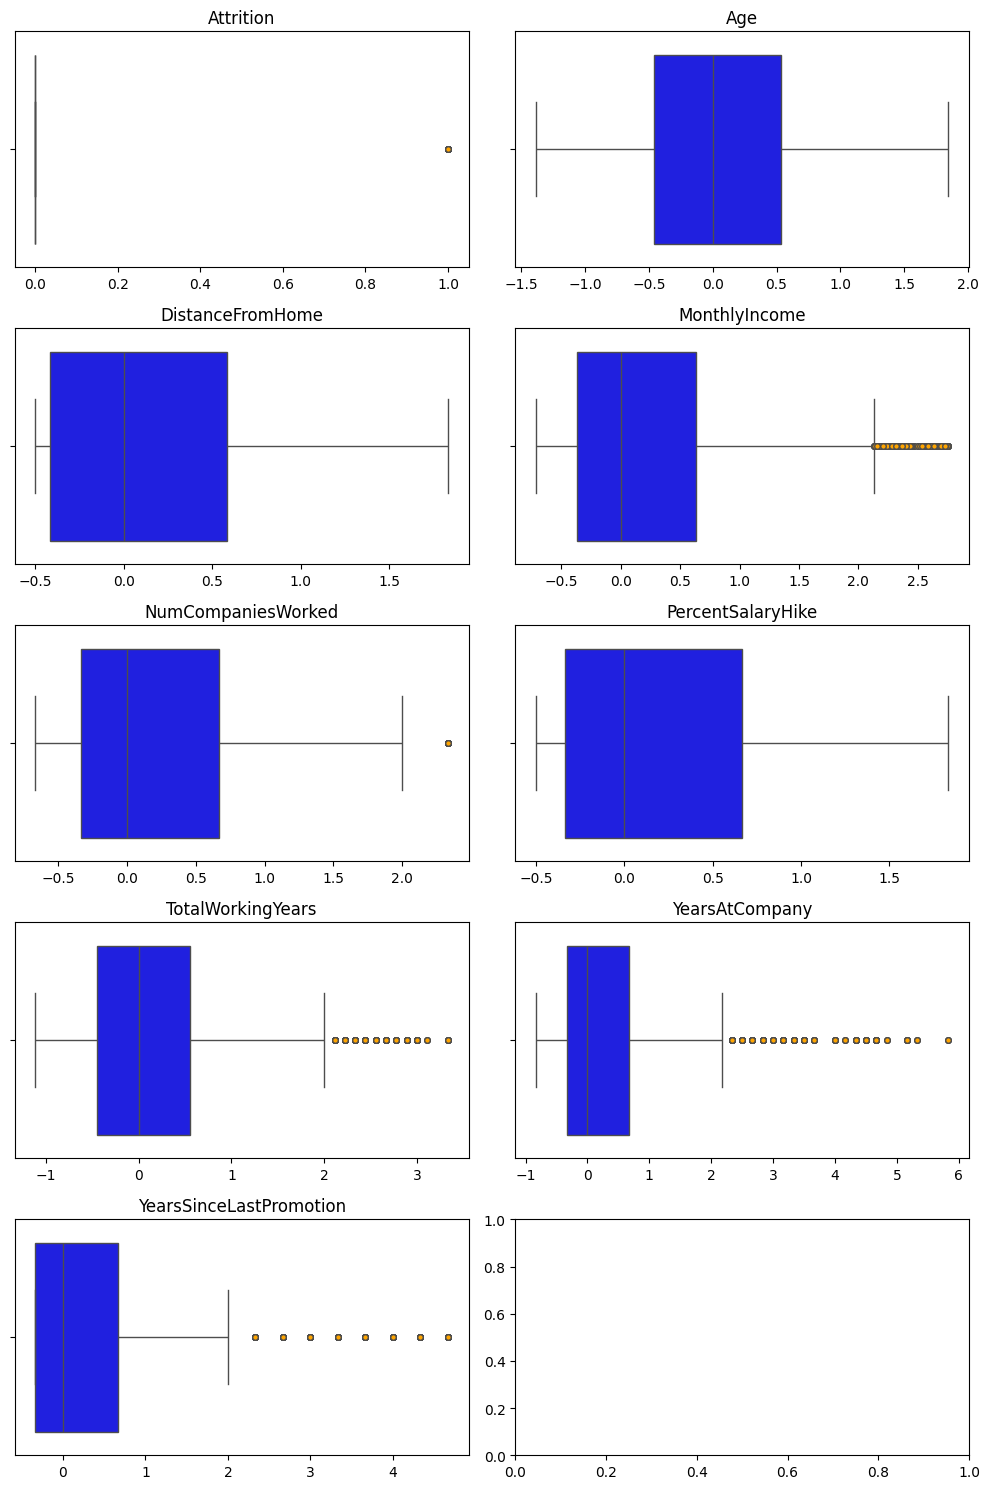

In [10]:
gestion = so.GestionOutliersUnivariados(df_outliers)

# llamamos al método que nos permite identificar outliers univariados de forma visual (boxplot)
gestion.visualizar_outliers_univariados()

Vamos a estudiar analíticamente cuántos outliers tenemos en cada columna

In [11]:
so.describe_outliers(df_outliers)

,columna,n_outliers,limite_inf,limite_sup,%_outliers
0,Attrition,711,0.000000,0.000000,16.12
3,MonthlyIncome,342,-1.867160,2.132840,7.76
8,YearsSinceLastPromotion,321,-1.833333,2.166667,7.28
7,YearsAtCompany,312,-1.833333,2.166667,7.07
6,TotalWorkingYears,189,-1.944444,2.055556,4.29
4,NumCompaniesWorked,156,-1.833333,2.166667,3.54
2,DistanceFromHome,0,-1.916667,2.083333,0.00
1,Age,0,-1.961538,2.038462,0.00
5,PercentSalaryHike,0,-1.833333,2.166667,0.00


Hay tres columnas con un numero importante de outliers, a parte de Attrition, que siendo la variable respuesta la dejaremos como está, MonthlyIncome, TotalWorkingYears y YearsAtCompany. No los vamos a eliminar, porque no tenemos evidencias de que sean datos erroneos, de hecho, es razonable que aquellos que tienen más experiencia laboral y/o llevan mmás años en la companía tengan un sueldo mensual más alto, así que es posible que esos datos sean lógicos y estén conectados entre sí. No obstante, esperaremos a estudiar los otuliers multivariados para tomar una decisión.

Procedemos con el estudio de los outliers multivariados. En primer lugar los visualizamos

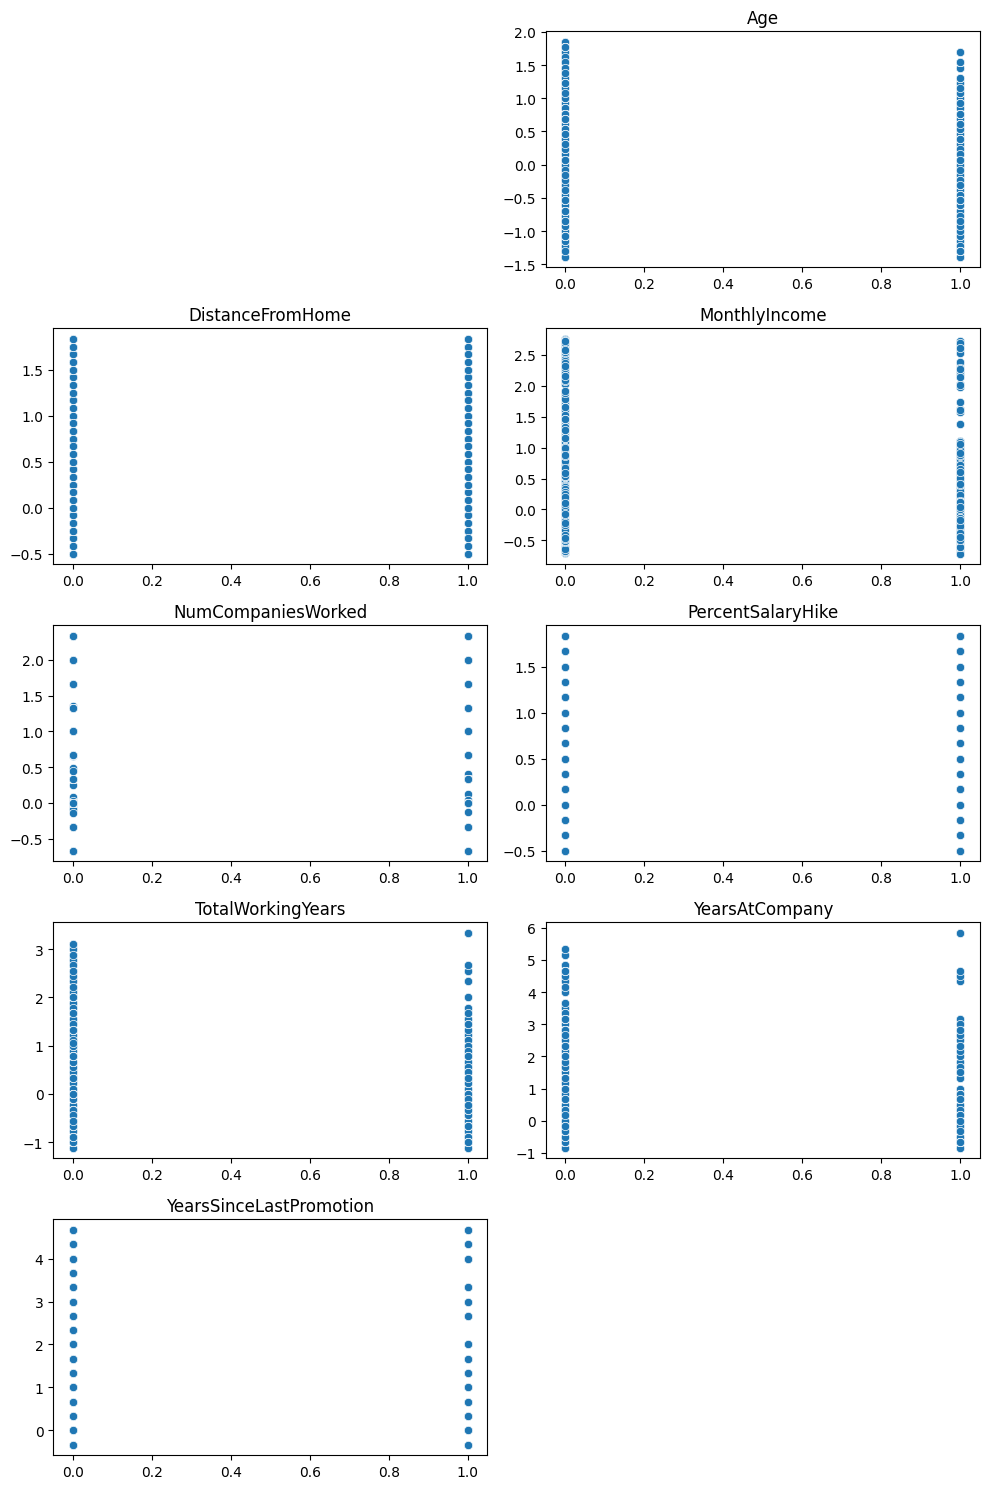

In [12]:
gestion = so.GestionOutliersMultivariados(df_outliers)

# llamamos al método que nos permite identificar outliers univariados de forma visual (boxplot)
gestion.visualizar_outliers_bivariados("Attrition")

Vamos a gestionar los outliers Multivariados con IsolationForest, que es menos costoso computancionalmente que LOF y detectamejor los outliers generales (valores atípicos en todo el conjunto de datos).

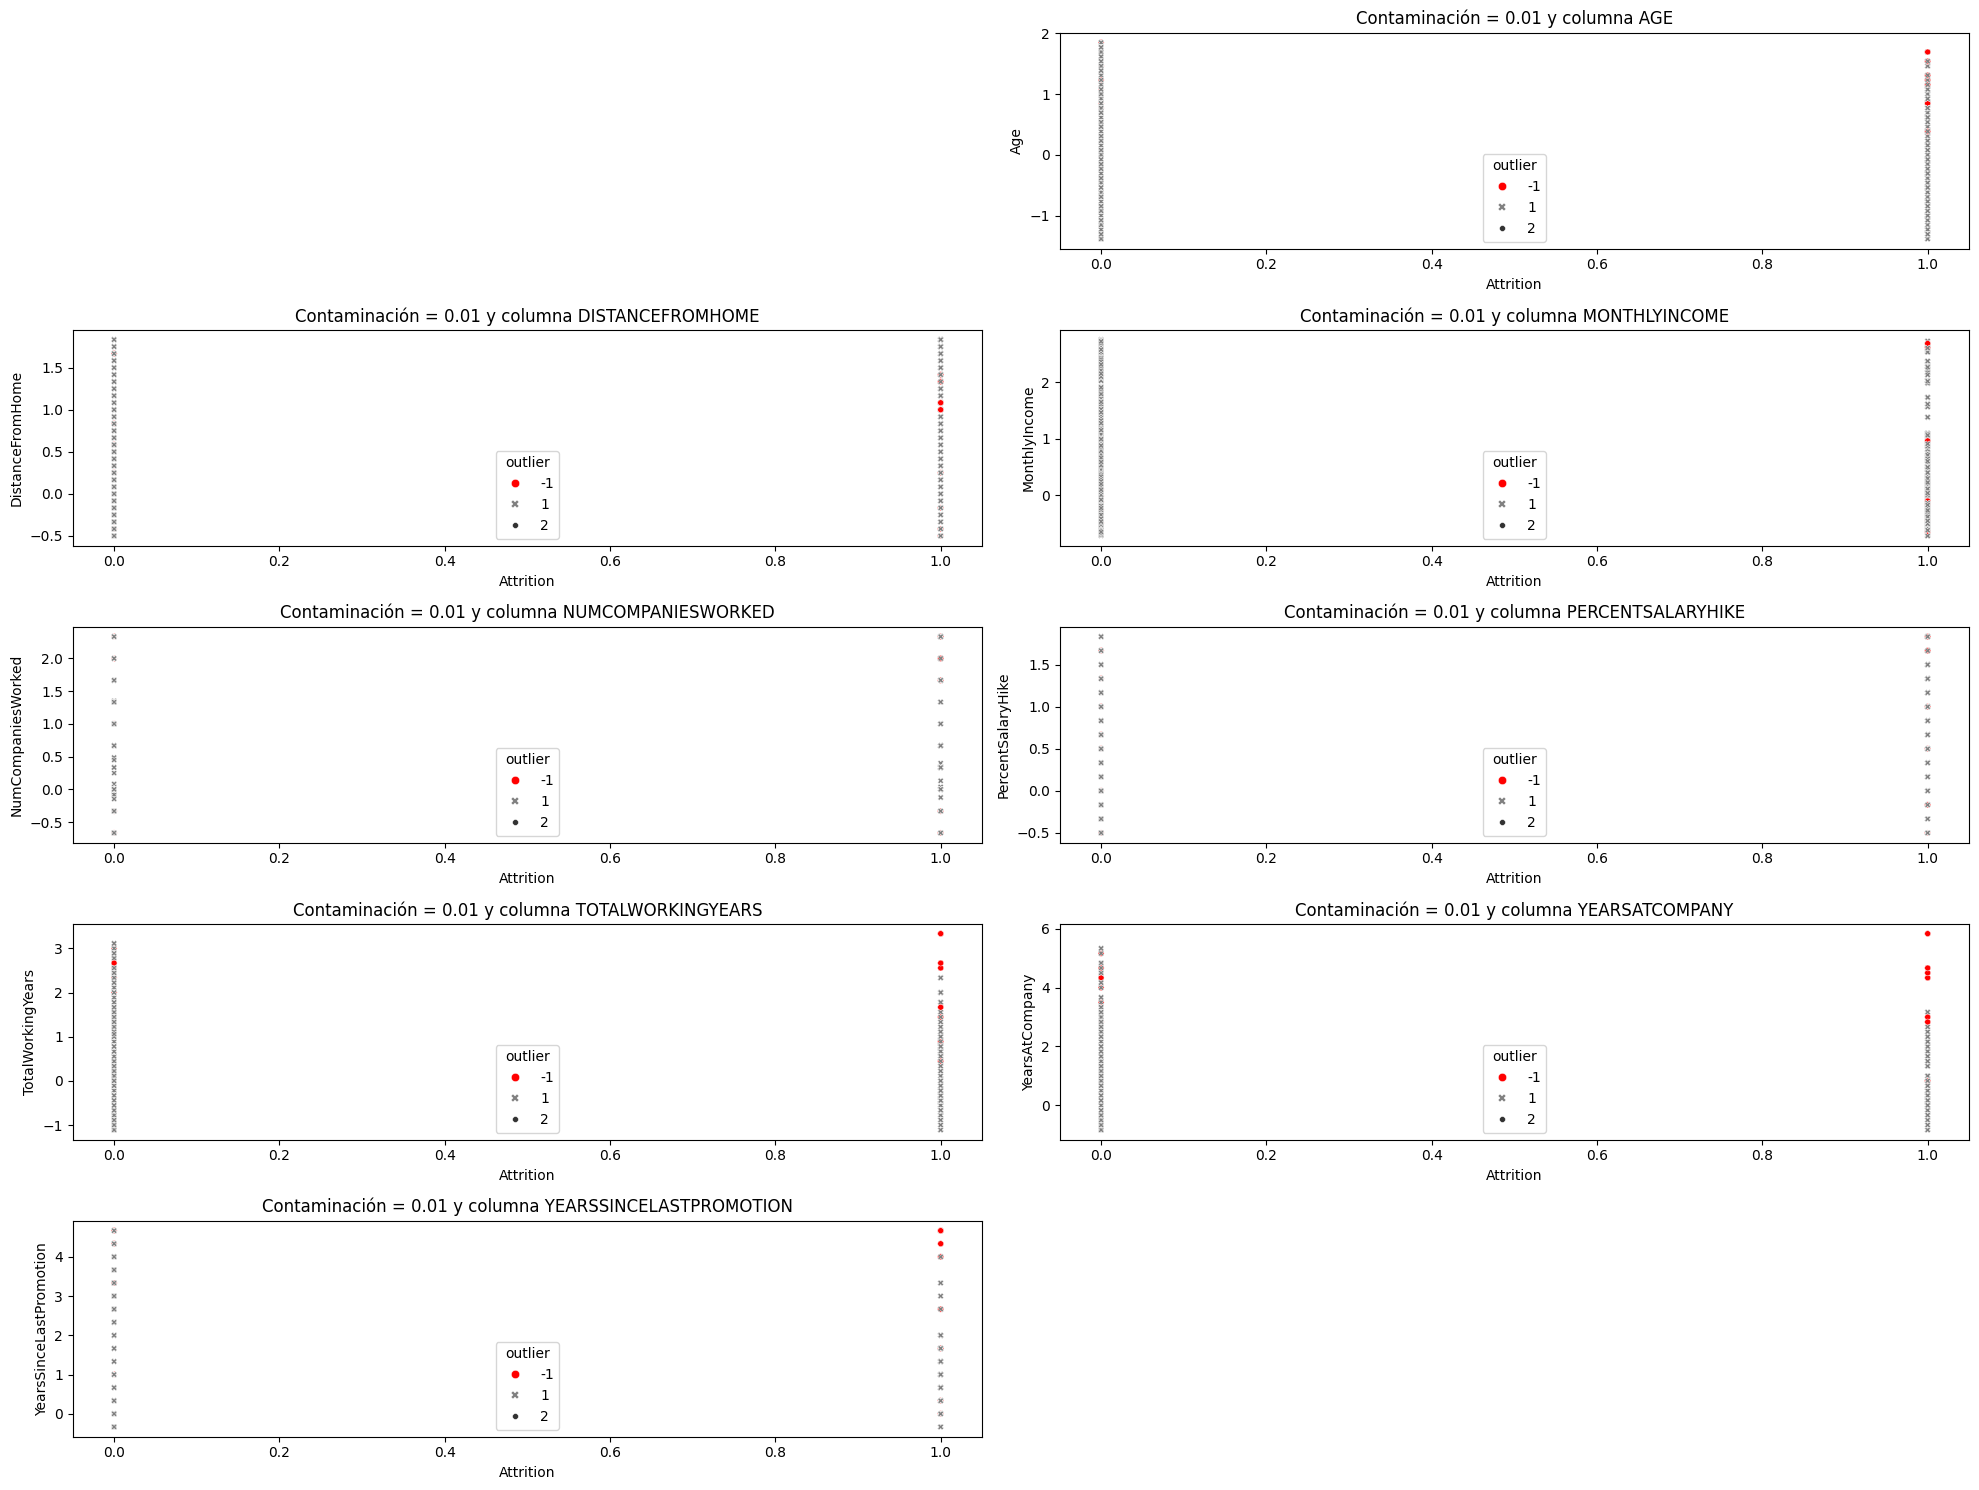

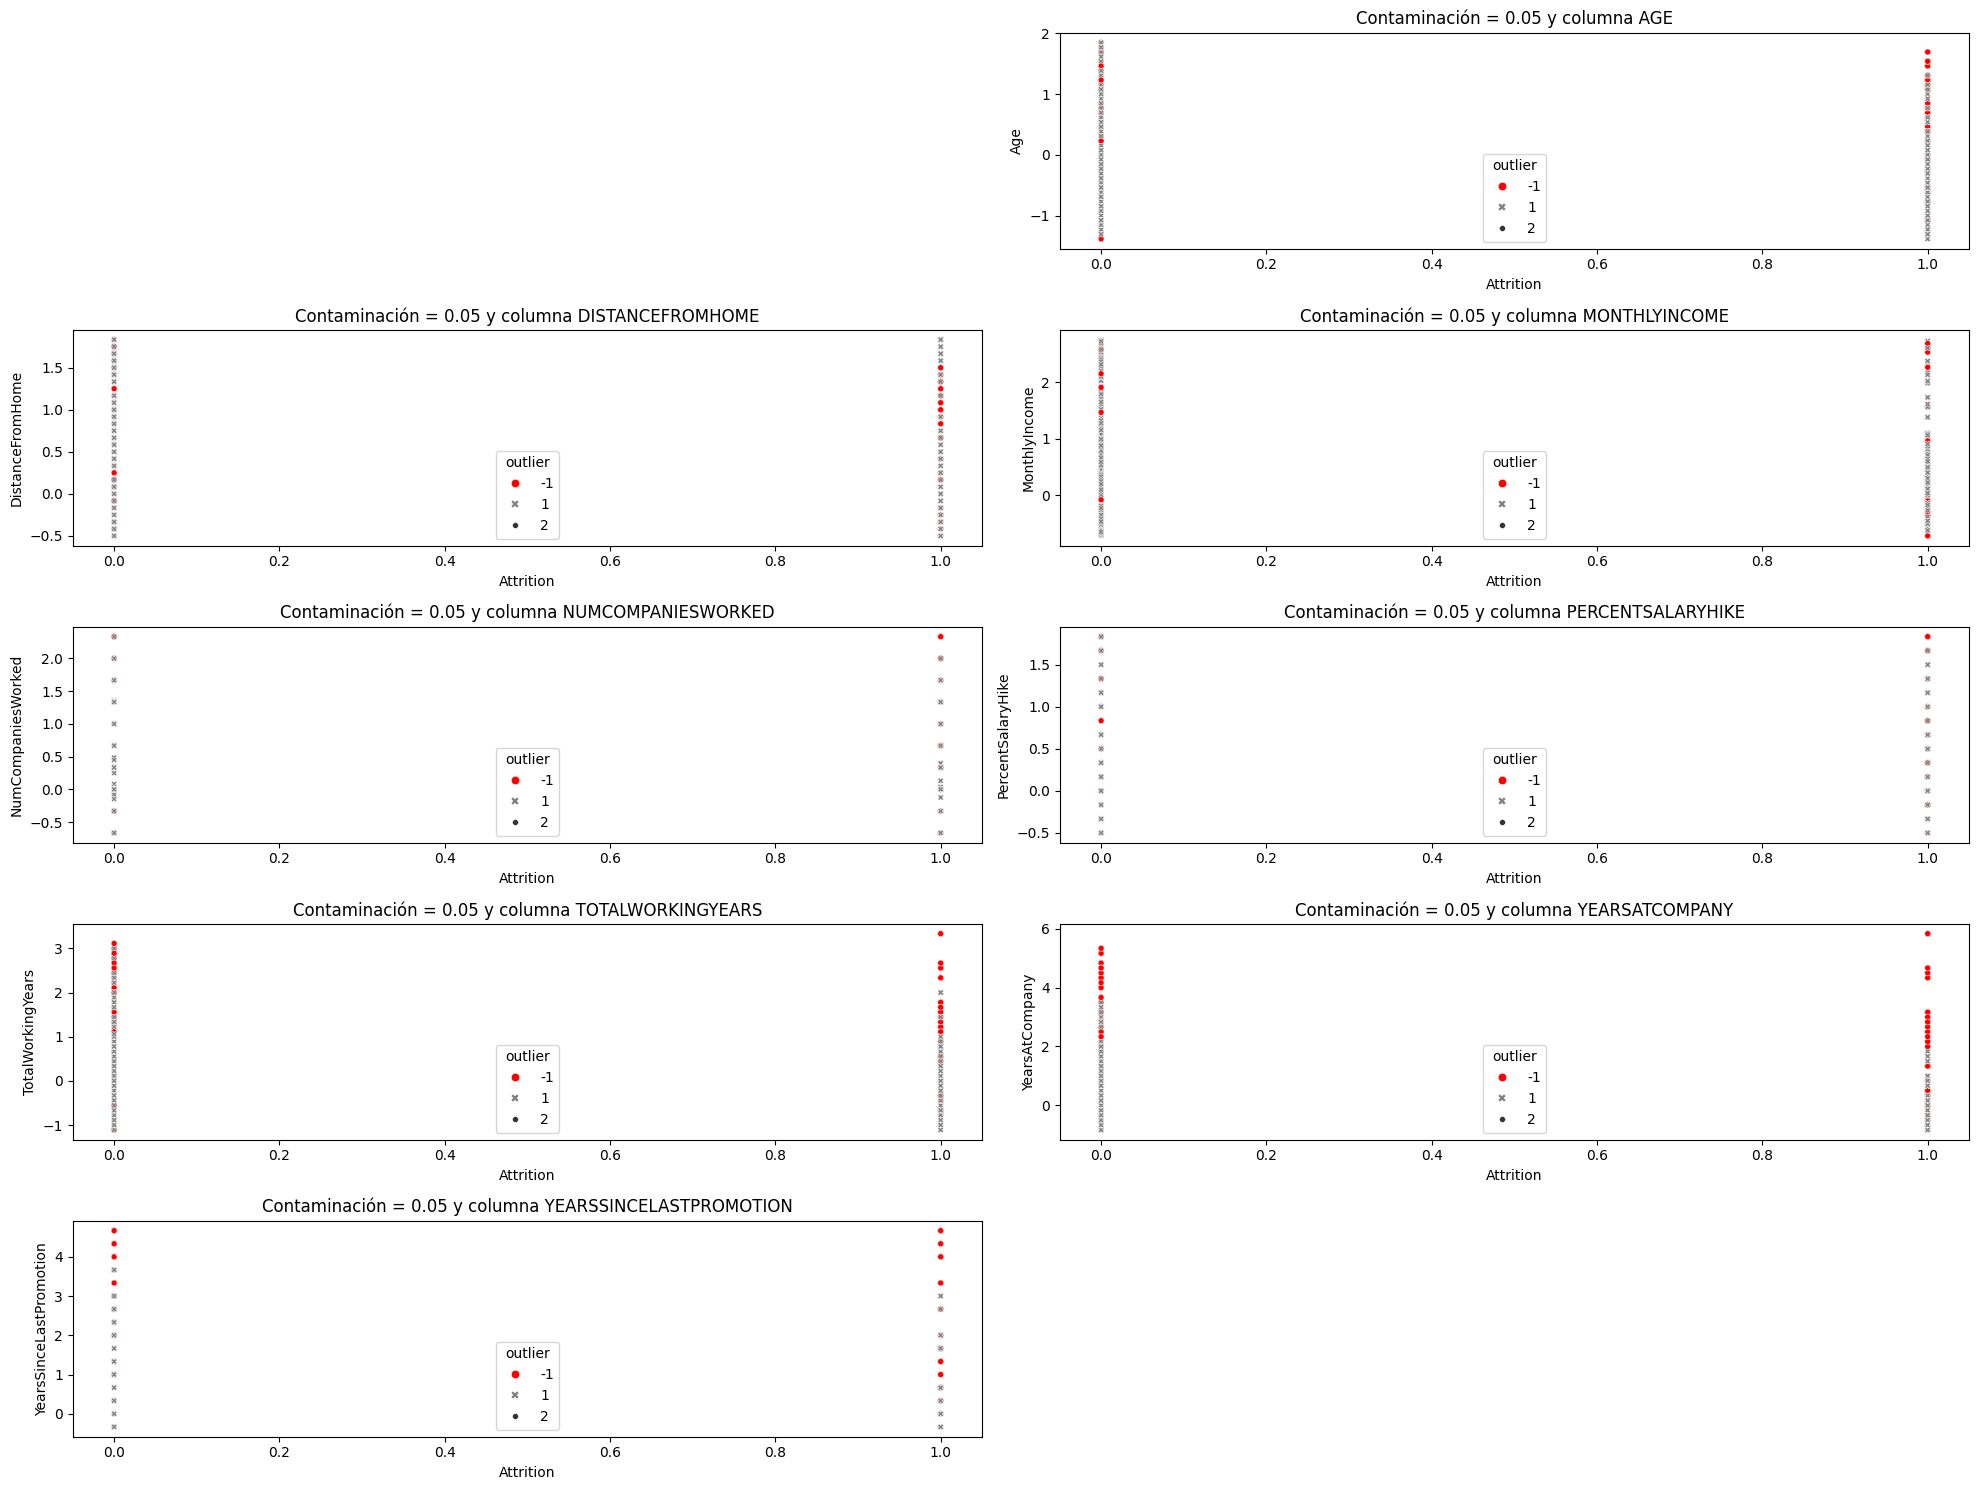

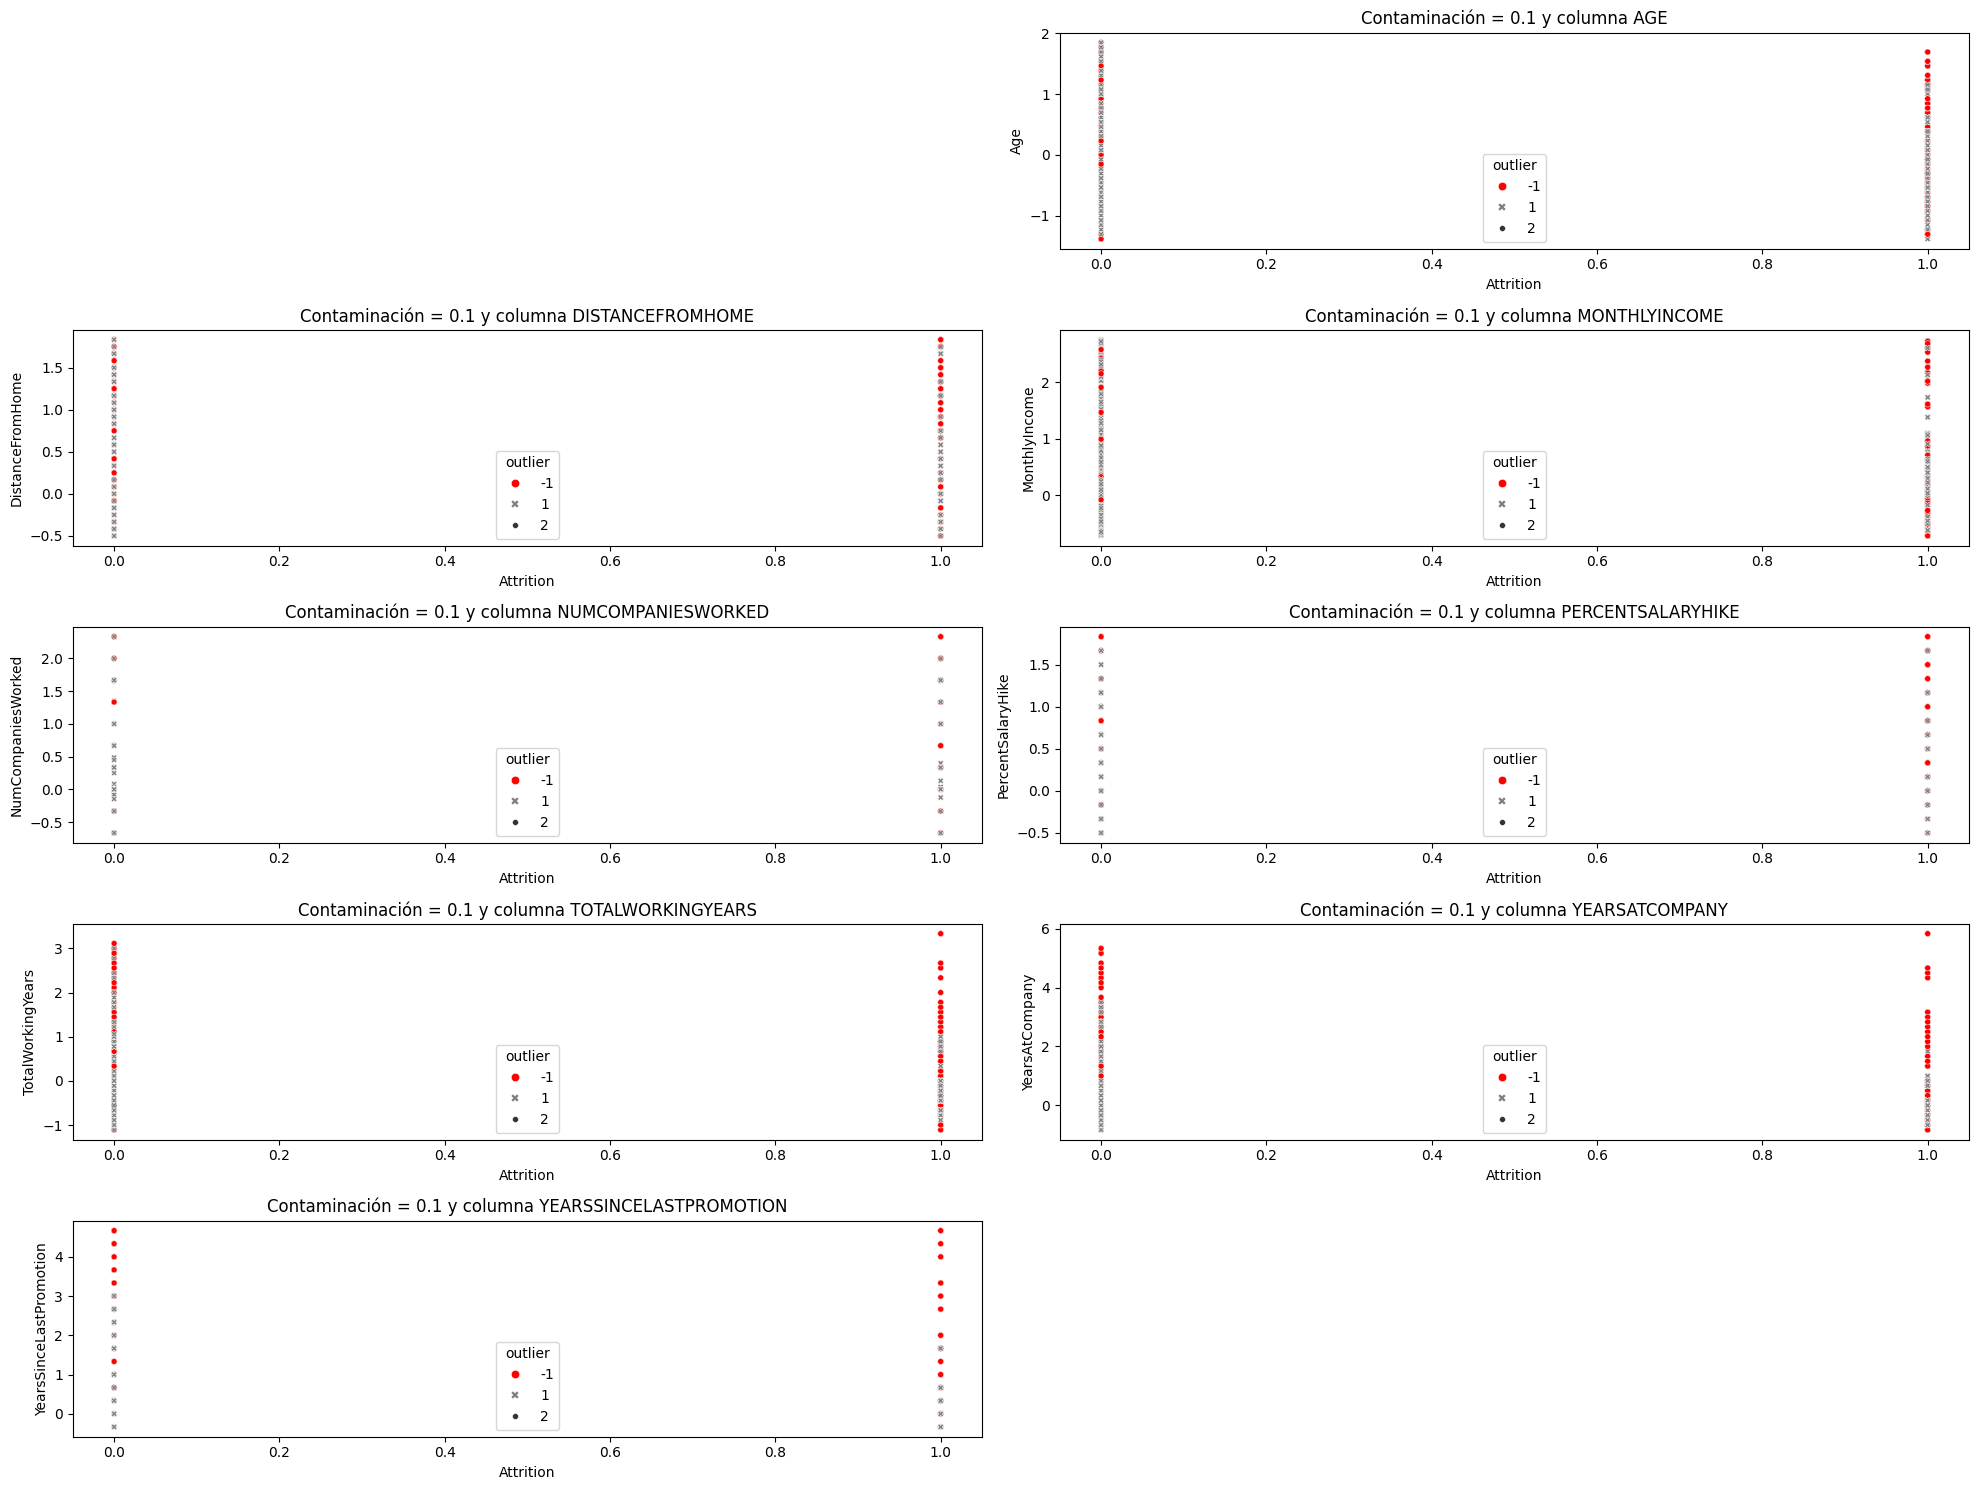

In [13]:
gestion.explorar_outliers_if("Attrition")

In [14]:
contaminacion = [0.01, 0.05]
estimadores = [25, 50, 75]

df_outliers = so.outliers_isolation_forest(df_outliers, contaminacion, estimadores)
df_outliers.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,JobInvolvement,Gender_Female,Gender_Male,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Education_5.0,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,0.0,0.0,-0.9757428617518955,1.0,1.153846,0.0,-1.0,-0.083333,0.533045977011493,-0.4637062838161343,0.0,1.498811,-0.333333,-0.500000,-1.000000,-3.415572040807982,-0.666667,-0.333333,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1
1,1.0,0.0,0.0,1.4248750185616,-0.384615,0.09952892067107169,0.0,0.250000,0.533045977011493,0.5238411596221293,1.0,-0.133480,-0.666667,1.500000,-0.444444,0.10237659963436946,0.000000,0.000000,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,1
2,0.0,0.7658035397332527,0.0,6.8505006797942904,-0.307692,0.09952892067107169,0.0,0.833333,-4.206791420725185,0.1773559143770109,0.0,2.634668,-0.333333,0.166667,-0.555556,0.0,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1
3,0.0,-0.23419646026674737,-0.9757428617518955,0.0,0.153846,-0.06956855225311602,0.0,-0.416667,0.533045977011493,-0.7459473750454625,0.0,0.622052,0.333333,-0.500000,0.333333,-0.8976234003656306,0.500000,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1
4,0.0,-0.23419646026674737,1.2600378155516458,0.0,-0.307692,0.0,0.0,0.250000,0.0,0.1773559143770109,1.0,-0.471201,0.666667,-0.333333,-0.111111,0.0,0.166667,-0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1,1,1


Ahora filtramos para quedarnos con las filas que tengan más de un 66% de ouliers

In [15]:
cantidad_col = 4
df_filtrado = df_outliers[(df_outliers == -1).sum(axis=1) > cantidad_col]
df_filtrado.shape

(42, 41)

Tenemos 42 outliers de un totoal de 4410 filas, es un porcentaje muy bajo, por lo que en este primer modelo los eliminamos.

Para eliminar, primero volvemos a juntar todas las columnas del dataframe

In [16]:
df_outliers=df_outliers.drop(df_filtrado.index)

In [17]:
df_outliers=df_outliers.reset_index(drop=True)

In [18]:
df_outliers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4368 non-null   float64
 1   EnvironmentSatisfaction  4368 non-null   object 
 2   JobSatisfaction          4368 non-null   object 
 3   WorkLifeBalance          4368 non-null   object 
 4   Age                      4368 non-null   float64
 5   BusinessTravel           4368 non-null   object 
 6   Department               4368 non-null   object 
 7   DistanceFromHome         4368 non-null   float64
 8   EducationField           4368 non-null   object 
 9   JobRole                  4368 non-null   object 
 10  MaritalStatus            4368 non-null   object 
 11  MonthlyIncome            4368 non-null   float64
 12  NumCompaniesWorked       4368 non-null   float64
 13  PercentSalaryHike        4368 non-null   float64
 14  TotalWorkingYears       

In [19]:
df_resultado = df_outliers.drop(columns=df_outliers.filter(like="outliers").columns)
df_resultado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4368 non-null   float64
 1   EnvironmentSatisfaction  4368 non-null   object 
 2   JobSatisfaction          4368 non-null   object 
 3   WorkLifeBalance          4368 non-null   object 
 4   Age                      4368 non-null   float64
 5   BusinessTravel           4368 non-null   object 
 6   Department               4368 non-null   object 
 7   DistanceFromHome         4368 non-null   float64
 8   EducationField           4368 non-null   object 
 9   JobRole                  4368 non-null   object 
 10  MaritalStatus            4368 non-null   object 
 11  MonthlyIncome            4368 non-null   float64
 12  NumCompaniesWorked       4368 non-null   float64
 13  PercentSalaryHike        4368 non-null   float64
 14  TotalWorkingYears       

In [20]:
df_resultado.to_pickle("../../datos/modelo1/datos_preprocesados.pkl")